
## **Step 1: Define the Problem**
### **Task:**
Understand the problem and its real-world implications. Automating traffic monitoring using computer vision can improve traffic management, reduce congestion, and enhance road safety.

### **Mini-task:**
Write a brief paragraph on how computer vision benefits traffic management systems.

**Example:**
Computer vision enables real-time monitoring of traffic by automatically detecting vehicles, estimating traffic density, and identifying anomalies like accidents or traffic jams. This automation reduces the need for manual intervention, improves response times, and provides data-driven insights for better traffic management.

The role of computer vision in enhancing conventional traffic management systems cannot be overstated. Over the past decade, global traffic infrastructures have witnessed remarkable improvements in monitoring, control, and safety — largely due to the integration of computer vision technologies. By enabling real-time analysis of video footage from traffic cameras, these systems can detect traffic violations, manage congestion through adaptive signaling, and even predict accidents before they occur. Advanced techniques such as object detection, vehicle tracking, and license plate recognition have made it possible to automate enforcement and improve emergency response times. As cities continue to grow and transportation demands increase, computer vision stands out as a key driver in building smarter, safer, and more efficient urban mobility systems.

## **Step 2: Data Collection**
### **Task:**
Collect video data of traffic scenes suitable for analysis. Publicly available datasets such as the **UA-DETRAC dataset** or traffic surveillance videos from Kaggle can be used.

### **Mini-task:**
Download and load a suitable dataset for traffic monitoring.

```python
# Example: Load a video file for traffic analysis
import cv2

video_path = 'traffic_video.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully.")

In [4]:

import kagglehub
path = kagglehub.dataset_download("shawon10/road-traffic-video-monitoring")
print("Path to dataset files:", path)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\shawon10\road-traffic-video-monitoring\versions\3


In [5]:
# Example: Load a video file for traffic analysis
import cv2

video_path = 'shawon10/road-traffic-video-monitoring'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully.")

Error: Could not open video.


In [6]:
import os

video_path_file  = os.path.join(path, 'british_highway_traffic.mp4')
print(f"path to video file: {video_path_file} ")


cap = cv2.VideoCapture(video_path_file)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully.")

path to video file: C:\Users\Dell\.cache\kagglehub\datasets\shawon10\road-traffic-video-monitoring\versions\3\british_highway_traffic.mp4 
Video loaded successfully.


## **Step 3: Exploratory Data Analysis (EDA)**
### **Task:**
Analyze the video data to understand traffic patterns, vehicle types, and density. Extract key frames and visualize traffic scenes.

### **Mini-task:**
Visualize the distribution of vehicle types and traffic density in the dataset.

```python
import matplotlib.pyplot as plt

# Example: Plot traffic density over time
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
density_over_time = []

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    # Perform vehicle detection and count (using YOLO or other models)
    # density_over_time.append(vehicle_count)

plt.plot(density_over_time)
plt.title("Traffic Density Over Time")
plt.xlabel("Frame Number")
plt.ylabel("Vehicle Count")
plt.show()

In [7]:
%pip install ultralytics matplotlib

Note: you may need to restart the kernel to use updated packages.


### Mini-task: Visualize the distribution of vehicle types and traffic density in the dataset.

Video re-opened successfully for analysis.


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\utils\backends.py:94: RuntimeWarning: networkx backend defined more than once: nx_loopback
  backends = _get_backends("networkx.backends")


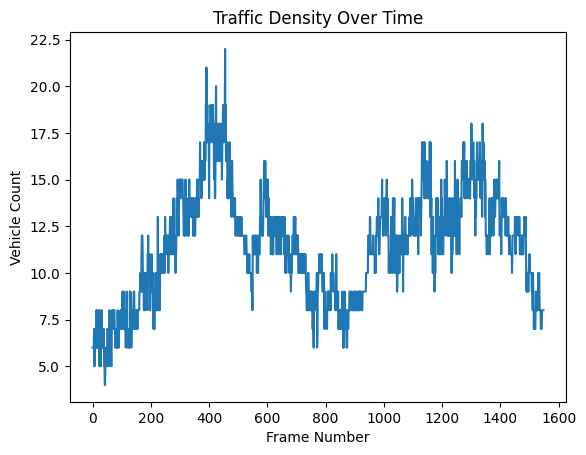

In [8]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
import numpy as np

# Load a pre-trained YOLO model
model = YOLO('yolov8n.pt')

# Re-open the video capture since it was closed in the previous step
cap = cv2.VideoCapture(video_path_file)

if not cap.isOpened():
    print("Error: Could not re-open video for analysis.")
else:
    print("Video re-opened successfully for analysis.")

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
density_over_time = []

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    # Perform vehicle detection and count using YOLO
    results = model(frame, verbose=False) # Set verbose to False to suppress output for each frame
    # Assuming classes like 'car', 'truck', 'bus', 'motorcycle' are vehicles
    vehicle_count = sum(1 for box in results[0].boxes if model.names[int(box.cls)] in ['car', 'truck', 'bus', 'motorcycle'])
    density_over_time.append(vehicle_count)

cap.release() # Release the video capture after processing all frames

plt.plot(density_over_time)
plt.title("Traffic Density Over Time")
plt.xlabel("Frame Number")
plt.ylabel("Vehicle Count")
plt.show()

* * *

## **Step 4: Video Preprocessing**
### **Task:**
Preprocess the video data for analysis. Techniques include:
- Frame extraction
- Resizing and normalization
- Noise reduction

### **Mini-task:**
Extract and preprocess a few frames from the video.

Video re-opened successfully for frame extraction.


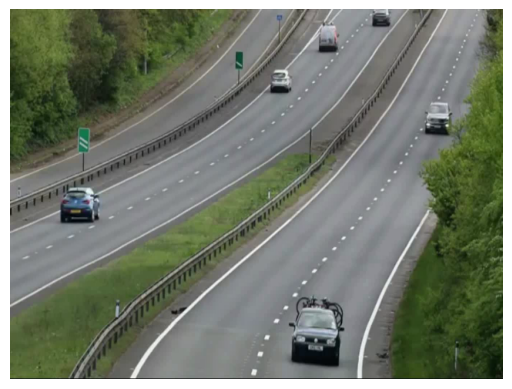

In [9]:
# Example: Extract and preprocess frames
import cv2
def preprocess_frame(frame):
    frame = cv2.resize(frame, (640, 480))  # Resize frame
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale - Remove this line
    return frame

frames = []
# Re-open the video capture since it was closed in the previous step
cap = cv2.VideoCapture(video_path_file)

if not cap.isOpened():
    print("Error: Could not re-open video for frame extraction.")
else:
    print("Video re-opened successfully for frame extraction.")

for i in range(10):  # Extract first 10 frames
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(preprocess_frame(frame))

cap.release() # Release the video capture after processing

# Display a sample frame
# We can display a color frame now, but matplotlib expects RGB, and opencv reads BGR
plt.imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

* * *

## **Step 5: Feature Engineering**
### **Task:**
Extract features from the video data for analysis. Techniques include:
- Vehicle detection using **YOLO**
- Traffic density estimation
- Vehicle tracking

### **Mini-task:**
Perform vehicle detection using a pre-trained YOLO model.

In [10]:
from ultralytics import YOLO

# Load a pre-trained YOLO model
model = YOLO('yolov8n.pt')

# Perform vehicle detection on a frame
results = model(frames[0])

# Visualize the results
results[0].show()


0: 480x640 1 person, 6 cars, 1 truck, 644.7ms
Speed: 9.1ms preprocess, 644.7ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)
0: 480x640 1 person, 6 cars, 1 truck, 644.7ms
Speed: 9.1ms preprocess, 644.7ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


In [11]:
from ultralytics import YOLO

# Load a pre-trained YOLO model
model = YOLO('yolov8n.pt')

# Perform vehicle detection on a frame
results = model(frames[0])

# Visualize the results
results[0].show()


0: 480x640 1 person, 6 cars, 1 truck, 476.6ms
Speed: 30.4ms preprocess, 476.6ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 640)
0: 480x640 1 person, 6 cars, 1 truck, 476.6ms
Speed: 30.4ms preprocess, 476.6ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 640)


* * *

## **Step 6: Model Training and Analysis**
### **Task:**
Train a model to analyze traffic patterns, such as predicting traffic density or detecting anomalies. Use classical machine learning models or deep learning models.

### **Mini-task:**
Train a simple model to classify traffic density (low, medium, high) based on vehicle counts.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Example: Train a traffic density classifier
# Assuming 'density_over_time' list from Step 3 is available and contains vehicle counts per frame
if 'density_over_time' not in locals():
    print("Error: 'density_over_time' not found. Please run Step 3 code to generate vehicle counts.")
else:
    X = np.array(density_over_time).reshape(-1, 1)  # Feature: vehicle count
    # Define simple thresholds for low, medium, and high density
    # These thresholds can be adjusted based on the dataset
    low_threshold = np.percentile(X, 33)
    high_threshold = np.percentile(X, 66)

    y = np.where(X < low_threshold, 0, np.where(X < high_threshold, 1, 2))  # Labels: 0=low, 1=medium, 2=high

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression Model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predictions
    accuracy = model.score(X_test, y_test)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Accuracy: 100.00%


In [13]:
from ultralytics import YOLO

# Load a pre-trained YOLO model
model = YOLO('yolov8n.pt')

# Perform vehicle detection on a frame
results = model(frames[0])

# Visualize the results
results[0].show()


0: 480x640 1 person, 6 cars, 1 truck, 4679.4ms
Speed: 21.1ms preprocess, 4679.4ms inference, 24.8ms postprocess per image at shape (1, 3, 480, 640)
0: 480x640 1 person, 6 cars, 1 truck, 4679.4ms
Speed: 21.1ms preprocess, 4679.4ms inference, 24.8ms postprocess per image at shape (1, 3, 480, 640)


* * *

## **Step 7: Deployment and Visualization**
### **Task:**
Deploy the traffic monitoring system and visualize the results in real-time. Use tools like **OpenCV** for real-time visualization.

### **Mini-task:**
Create a real-time traffic monitoring dashboard using OpenCV.

Video re-opened successfully for real-time monitoring.


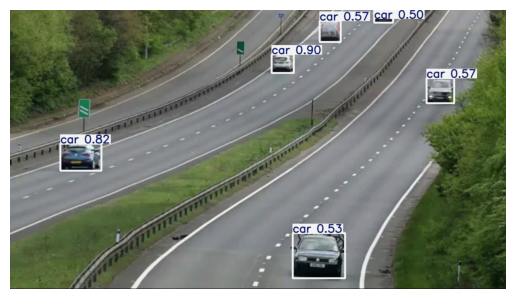

In [14]:
# Example: Real-time traffic monitoring
# Re-open the video capture since it was closed in the previous step
cap = cv2.VideoCapture(video_path_file)

if not cap.isOpened():
    print("Error: Could not re-open video for real-time monitoring.")
else:
    print("Video re-opened successfully for real-time monitoring.")

# Load a pre-trained YOLO model
model = YOLO('yolov8n.pt')

import matplotlib.pyplot as plt

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform vehicle detection
    results = model(frame, verbose=False) # Set verbose to False to suppress output for each frame
    annotated_frame = results[0].plot()

    # Display the annotated frame inline using matplotlib
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Optional: break after showing one frame to avoid flooding the notebook
    break

cap.release()
cv2.destroyAllWindows()


## **Optional: Advanced Techniques**
### **Task:**
Explore advanced techniques like:
- **Anomaly detection** (e.g., accidents or traffic jams)
- **Traffic flow prediction** using time series analysis
- **Integration with IoT devices** for real-time data collection



In [15]:
# Example: Integration with IoT devices for real-time traffic data collection using MQTT
import paho.mqtt.client as mqtt
import json
import time

# Define MQTT broker details
broker_address = "test.mosquitto.org"
topic = "traffic/monitoring"

# Callback function for connection
def on_connect(client, userdata, flags, rc):
    print(f"Connected to MQTT Broker with result code {rc}")

# Callback function for message reception
def on_message(client, userdata, msg):
    data = json.loads(msg.payload.decode())
    print(f"Received data from IoT device: {data}")

# Create MQTT client and connect
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message
client.connect(broker_address, 1883, 60)

# Subscribe to topic
client.subscribe(topic)

# Simulate sending traffic data from an IoT device (e.g., Raspberry Pi)
def send_traffic_data(vehicle_count):
    payload = json.dumps({"timestamp": time.time(), "vehicle_count": vehicle_count})
    client.publish(topic, payload)
    print(f"Sent data: {payload}")

# Start MQTT loop in a separate thread
import threading
def mqtt_loop():
    client.loop_forever()
threading.Thread(target=mqtt_loop, daemon=True).start()

# Example: Send traffic data every 5 seconds (simulate real-time collection)
for i in range(3):
    vehicle_count = 10 + i * 5  # Simulated data
    send_traffic_data(vehicle_count)
    time.sleep(5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12888\1153402773.py:20: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


Sent data: {"timestamp": 1752499581.747825, "vehicle_count": 10}
Connected to MQTT Broker with result code 0
Received data from IoT device: {'timestamp': 1752499581.747825, 'vehicle_count': 10}
Sent data: {"timestamp": 1752499586.7577357, "vehicle_count": 15}
Received data from IoT device: {'timestamp': 1752499586.7577357, 'vehicle_count': 15}
Sent data: {"timestamp": 1752499591.8026164, "vehicle_count": 20}
Received data from IoT device: {'timestamp': 1752499591.8026164, 'vehicle_count': 20}


Video opened for anomaly detection.
Anomaly detected at frame 373 (score: 5070704)
Anomaly detected at frame 378 (score: 5321003)
Anomaly detected at frame 383 (score: 5274620)
Anomaly detected at frame 388 (score: 6323131)
Anomaly detected at frame 1001 (score: 5023048)
Anomaly detected at frame 1344 (score: 5054295)
Anomaly detected at frame 1349 (score: 5222205)
Anomaly detected at frame 1354 (score: 5404143)
Anomaly detected at frame 1359 (score: 6920123)
Anomaly detected at frame 1364 (score: 7116702)
Anomaly detected at frame 1369 (score: 5642785)
Anomaly detected at frame 1374 (score: 5661070)
Anomaly detected at frame 1379 (score: 5772066)
Anomaly detected at frame 1384 (score: 5783634)
Anomaly detected at frame 1389 (score: 7139108)
Anomaly detected at frame 1394 (score: 5388448)
Anomaly detected at frame 1399 (score: 5090266)
Anomaly detected at frame 1474 (score: 5322531)
Anomaly detected at frame 1479 (score: 6224684)
Anomaly detected at frame 1484 (score: 5184461)


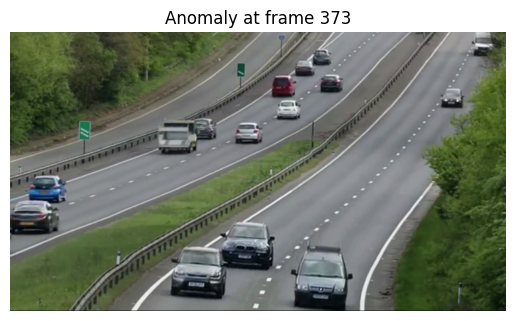

In [16]:
##Anomaly Detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Re-open the video capture if needed
cap = cv2.VideoCapture(video_path_file)
if not cap.isOpened():
    print("Error: Could not open video for anomaly detection.")
else:
    print("Video opened for anomaly detection.")

anomaly_frames = []
prev_frame = None
threshold = 5000000  # Adjust this value based on your video

frame_idx = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if prev_frame is not None:
        diff = cv2.absdiff(gray, prev_frame)
        score = np.sum(diff)
        if score > threshold:
            anomaly_frames.append(frame_idx)
            print(f"Anomaly detected at frame {frame_idx} (score: {score})")
    prev_frame = gray
    frame_idx += 1

cap.release()

# Display first anomaly frame if detected
if anomaly_frames:
    cap = cv2.VideoCapture(video_path_file)
    cap.set(cv2.CAP_PROP_POS_FRAMES, anomaly_frames[0])
    ret, anomaly_frame = cap.read()
    if ret:
        plt.imshow(cv2.cvtColor(anomaly_frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Anomaly at frame {anomaly_frames[0]}")
        plt.axis('off')
        plt.show()
    cap.release()
else:
    print("No anomalies detected.")

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


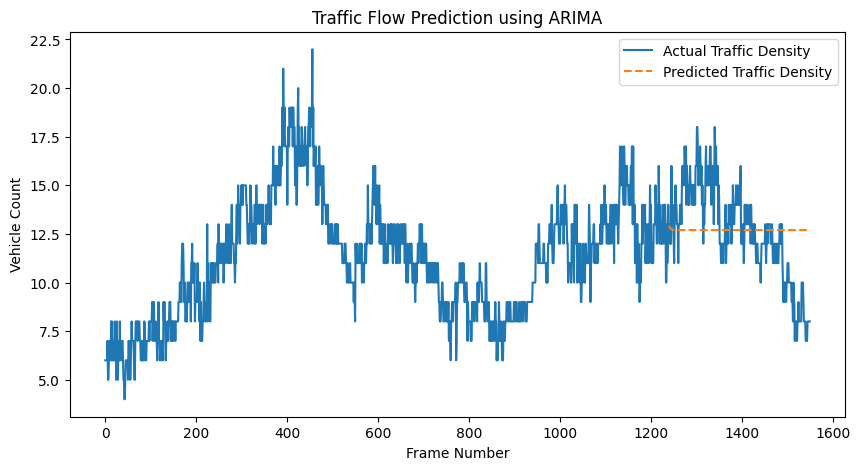

In [17]:
## Traffic flow prediction using time series analysis

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure density_over_time is available
if 'density_over_time' not in locals() or len(density_over_time) < 10:
    print("Error: 'density_over_time' not found or too short. Please run the vehicle counting code first.")
else:
    # Convert to numpy array
    data = np.array(density_over_time)

    # Split into train and test sets
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit ARIMA model (order can be tuned)
    model = ARIMA(train, order=(2,1,2))
    model_fit = model.fit()

    # Forecast next N points
    forecast_steps = len(test)
    forecast = model_fit.forecast(steps=forecast_steps)

    # Plot actual vs predicted
    plt.figure(figsize=(10,5))
    plt.plot(range(len(data)), data, label='Actual Traffic Density')
    plt.plot(range(train_size, train_size+forecast_steps), forecast, label='Predicted Traffic Density', linestyle='--')
    plt.xlabel('Frame Number')
    plt.ylabel('Vehicle Count')
    plt.title('Traffic Flow Prediction using ARIMA')
    plt.legend()
    plt.show()